In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

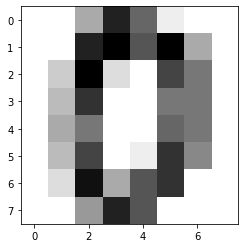

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split


digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [3]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

# 이미지를 평판화 n x sample x 8 8 => n_sample x 64

In [4]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
type(data)

numpy.ndarray

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [8]:
print("X train :", X_train.shape)
print("y train :", y_train.shape)
print("X test :", X_test.shape)
print("y test :", y_test.shape)

X train : (1437, 64)
y train : (1437,)
X test : (360, 64)
y test : (360,)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [10]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9694444444444444
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  1  0]
 [ 0  1 36  2  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  1  0]
 [ 0  1  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  1  0  0 32  0  0]
 [ 0  1  0  0  1  1  0  0 29  0]
 [ 0  0  0  0  0  1  0  0  0 39]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
cm_svm = confusion_matrix(y_test, pred_svm)
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.9861111111111112
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  1 30  0  0  0  0  0  0]
 [ 0  0  0  0 40  0  0  0  0  0]
 [ 0  0  0  0  0 27  1  0  0  0]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  0]
 [ 0  2  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  1  0  0  0 39]]


In [12]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
cm_dt = confusion_matrix(y_test, pred_dt)
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8611111111111112
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  2  0]
 [ 0  2 26  0  0  3  1  1  6  0]
 [ 0  2  0 24  0  0  0  1  1  3]
 [ 1  3  0  0 34  1  1  0  0  0]
 [ 0  0  0  0  0 26  1  0  0  1]
 [ 1  1  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  1  0  0 31  0  1]
 [ 0  1  0  1  2  1  1  0 25  1]
 [ 0  3  0  2  0  2  1  1  0 31]]


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
cm_rf = confusion_matrix(y_test, pred)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.975
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  1  0  0  1  1]
 [ 0  0  0  0 40  0  0  0  0  0]
 [ 0  0  0  0  0 27  1  0  0  0]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  0]
 [ 0  2  0  0  0  0  0  0 30  0]
 [ 0  1  0  1  0  1  0  0  0 37]]


In [14]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
cm_nn = confusion_matrix(y_test, pred_nn)
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.9666666666666667
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0  0 35  1  0  0  0  0  3  0]
 [ 0  0  2 28  0  1  0  0  0  0]
 [ 0  0  0  0 40  0  0  0  0  0]
 [ 0  0  0  0  0 27  1  0  0  0]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  0]
 [ 0  1  1  0  0  0  0  0 30  0]
 [ 0  0  0  1  0  1  0  0  0 38]]


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [16]:
y_pred = knn.predict(X_test)
# 정확도를 계산한다.

scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9777777777777777


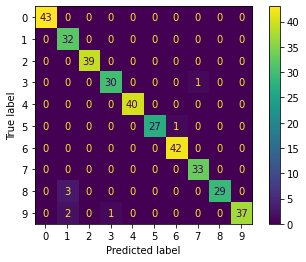

In [17]:
disp = metrics.plot_confusion_matrix(knn, X_test, y_test)
plt.show()

In [18]:
X = data
y = digits.target

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [19]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [20]:
Y

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [21]:
X.shape

(1797, 64)

In [22]:
Y.shape

(1797, 10)

In [23]:
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam
from keras.layers import Input, Dense
from keras.models import Model

# 이는 텐서를 반환합니다
inputs = Input(shape=(64,))
x = Dense(100, activation='relu')(inputs)
x1 = Dense(80, activation='relu')(x)
x2 = Dense(60, activation='relu')(x1)
x3 = Dense(30, activation='relu')(x2)
outputs=Dense(10,activation='softmax')(x3)

model = Model(inputs=inputs, outputs=outputs)
model.compile(Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])

model.summary()
"""

"from tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense\nfrom tensorflow.keras.optimizers import SGD,Adam\nfrom keras.layers import Input, Dense\nfrom keras.models import Model\n\n# 이는 텐서를 반환합니다\ninputs = Input(shape=(64,))\nx = Dense(100, activation='relu')(inputs)\nx1 = Dense(80, activation='relu')(x)\nx2 = Dense(60, activation='relu')(x1)\nx3 = Dense(30, activation='relu')(x2)\noutputs=Dense(10,activation='softmax')(x3)\n\nmodel = Model(inputs=inputs, outputs=outputs)\nmodel.compile(Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])\n\nmodel.summary()\n"

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from keras import backend 


model = Sequential()
#softmax, tanh
model.add(Dense(100,input_shape=(64,),activation='relu'))
model.add(Dense(70,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(10,activation='softmax'))
 
model.compile(Adam(lr=0.01), loss = 'categorical_crossentropy',metrics=['accuracy'])
#categorical_crossentropy

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               6500      
                                                                 
 dense_1 (Dense)             (None, 70)                7070      
                                                                 
 dense_2 (Dense)             (None, 40)                2840      
                                                                 
 dense_3 (Dense)             (None, 10)                410       
                                                                 
Total params: 16,820
Trainable params: 16,820
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
45/45 [==============================] - 1s 6ms/step - loss: 1.3062 - accuracy: 0.6374 - val_loss: 0.2723 - val_accuracy: 0.9083
Epoch 2/100
45/45 [==============================] - 0s 2ms/step - loss: 0.2682 - accuracy: 0.9054 - val_loss: 0.1770 - val_accuracy: 0.9556
Epoch 3/100
45/45 [==============================] - 0s 2ms/step - loss: 0.1494 - accuracy: 0.9513 - val_loss: 0.2580 - val_accuracy: 0.9139
Epoch 4/100
45/45 [==============================] - 0s 2ms/step - loss: 0.1927 - accuracy: 0.9408 - val_loss: 0.2559 - val_accuracy: 0.9361
Epoch 5/100
45/45 [==============================] - 0s 2ms/step - loss: 0.1518 - accuracy: 0.9541 - val_loss: 0.1500 - val_accuracy: 0.9528
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: 0.0946 - accuracy: 0.9687 - val_loss: 0.2195 - val_accuracy: 0.9472
Epoch 7/100
45/45 [==============================] - 0s 2ms/step - loss: 0.1339 - accuracy: 0.9569 - val_loss: 0.1054 - val_accuracy: 0.9667
Epoch 8/100
4

45/45 [==============================] - 0s 2ms/step - loss: 9.6079e-05 - accuracy: 1.0000 - val_loss: 0.1712 - val_accuracy: 0.9833
Epoch 59/100
45/45 [==============================] - 0s 2ms/step - loss: 8.9258e-05 - accuracy: 1.0000 - val_loss: 0.1720 - val_accuracy: 0.9833
Epoch 60/100
45/45 [==============================] - 0s 3ms/step - loss: 8.4300e-05 - accuracy: 1.0000 - val_loss: 0.1731 - val_accuracy: 0.9833
Epoch 61/100
45/45 [==============================] - 0s 2ms/step - loss: 7.6211e-05 - accuracy: 1.0000 - val_loss: 0.1740 - val_accuracy: 0.9833
Epoch 62/100
45/45 [==============================] - 0s 2ms/step - loss: 7.1820e-05 - accuracy: 1.0000 - val_loss: 0.1746 - val_accuracy: 0.9833
Epoch 63/100
45/45 [==============================] - 0s 2ms/step - loss: 6.7178e-05 - accuracy: 1.0000 - val_loss: 0.1758 - val_accuracy: 0.9833
Epoch 64/100
45/45 [==============================] - 0s 2ms/step - loss: 6.3609e-05 - accuracy: 1.0000 - val_loss: 0.1767 - val_accuracy

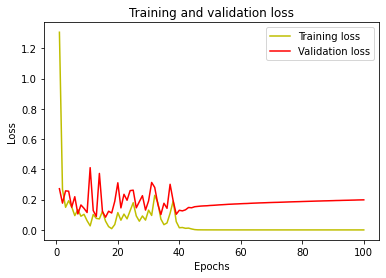

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

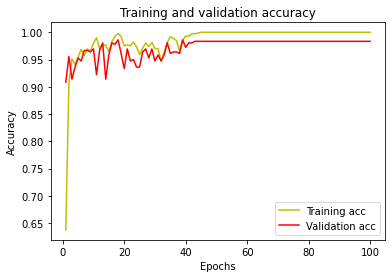

In [27]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      0.97      0.97        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        30
           5       0.97      0.97      0.97        40
           6       1.00      0.98      0.99        44
           7       0.97      1.00      0.99        39
           8       0.95      0.97      0.96        39
           9       0.97      0.95      0.96        41

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 43  0  1  0]
 [ 0  0  0